# Decomposition in Python
D-590. Spring 2022.

Adapted from Jason Brownlee. Ch. 10. Time Series in Pyton.

## White Noise

> It is helpful to create and review a white noise time series in practice. It will provide the frame of reference and example plots and statistical tests to use and compare on your own time series projects to check if they are white noise.

- We will create a list of 1,000 random Gaussian variables using the ```gauss()``` function from the ```random``` module

In [5]:
from random import gauss
from random import seed
import random
import numpy as np
from pandas import Series
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

- Syntax : random.gauss(mu, sigma)
- Parameters : mu = mean and sigma = standard deviation
- Returns : a random gaussian distribution floating number

In [2]:
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]

- ```panda.Series``` is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). 
- The axis labels are collectively called **index**. Input can be array, dict, scalar (constant)

In [3]:
series = Series(series)
series.head()

0    1.288185
1    1.449446
2    0.066336
3   -0.764544
4   -1.092173
dtype: float64

> Some variance is expected given the small size of the sample.
- the mean is nearly 0.0 
- the standard deviation is nearly 1.0

In [4]:
# summary stats
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


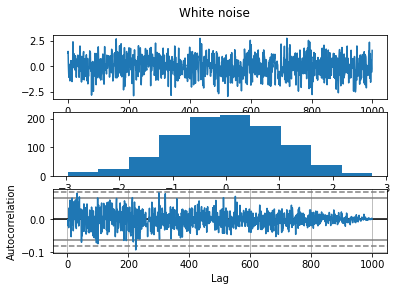

In [15]:
fig, ax = plt.subplots(3)
fig.suptitle('White noise')
# line plot
ax[0].plot(series) # should be random

# histogram plot
ax[1].hist(series) # should be a bell curve (distribution is Gaussiaan)

# autocorrelation

autocorrelation_plot(series, ax=ax[2]) # Note a different syntax for aautocorrelation as a SubFigure.
pyplot.show()

> Remember: If your time series is White Noise, it cannot be predicted

## Random Walk

**Applications**

- In computer networks, random walks can model the number of transmission packets buffered at a server.
- In population genetics, a random walk describes the statistical properties of genetic drift.
- In image segmentation, random walks are used to determine the labels (i.e., “object” or “background”) to associate with each pixel.
- In brain research, random walks and reinforced random walks are used to model cascades of neuron firing in the brain.
- Random walks have also been used to sample massive online graphs such as online social networks.

<small>Source: https://www.geeksforgeeks.org/random-walk-implementation-python/</small>

**Creating Random Walk**

- Initialize an object at position y.
- Randomly move the object up or down. In other words, add or subtract 1 from the y value.
- Keep track of all the positions of the object, that is, the y values.

In [13]:
# timepoints as X and position as Y

def randomwalk1D(n):
    x, y = 0, 0
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        # Randomly select either UP or DOWN
        step = random.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions

Note: ```numpy.arrange``` - Returns evenly spaced values within a given interval.

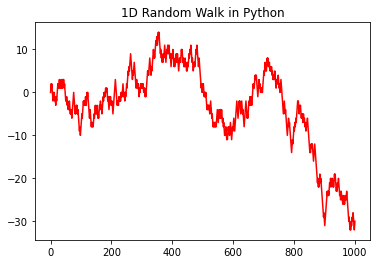

In [39]:
seed(1)
time_data, random_walk = randomwalk1D(1000)
plt.plot(time_data, random_walk , 'r-')
plt.title("1D Random Walk in Python")
plt.show()

**Testing**

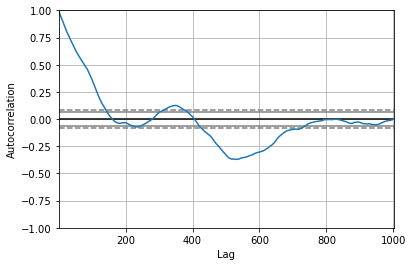

In [40]:
autocorrelation_plot(random_walk)
plt.show()

- Recall: random walks are non-stationary
- Check for non-stationarity with ADF test (Augmented Dickey-Fuller): ```adfuller()```
- The null hypothesis of the test is that the time series is non-stationary

In [44]:
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.496074
p-value: 0.892780
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


> Note on Using placeholders in print() statements. The difference between using ```{}``` and ```%``` is that you can specify the type, enforcing a certain expectation that whatever gets placed in the string literal is either a number or a string. For example, the placeholder ```%i``` expects an integer, and ```%s``` will expect a string literal.

The test statistic value is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary

**Differencing**

y - (y - 1)

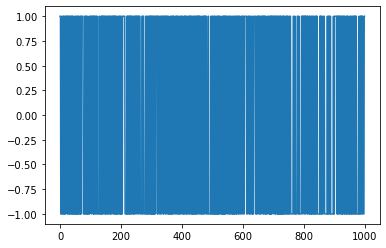

In [48]:
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
# line plot
plt.plot(diff)
plt.show()

> This difference graph shows that we have a series of random moves. Now we can calculate correlogram

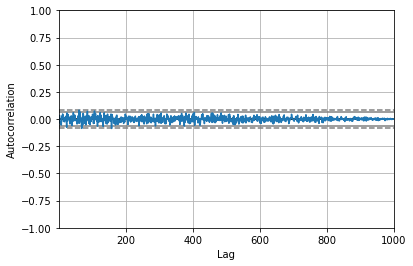

In [49]:
autocorrelation_plot(diff)
plt.show()

Note: no significant relationship between the lagged observations.

## Decomposition

- The ```Statsmodels``` library provides an implementation of the naive, or classical, decomposition method in a function called ```seasonal decompose()```
- It requires that you specify whether the model is additive or multiplicative

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

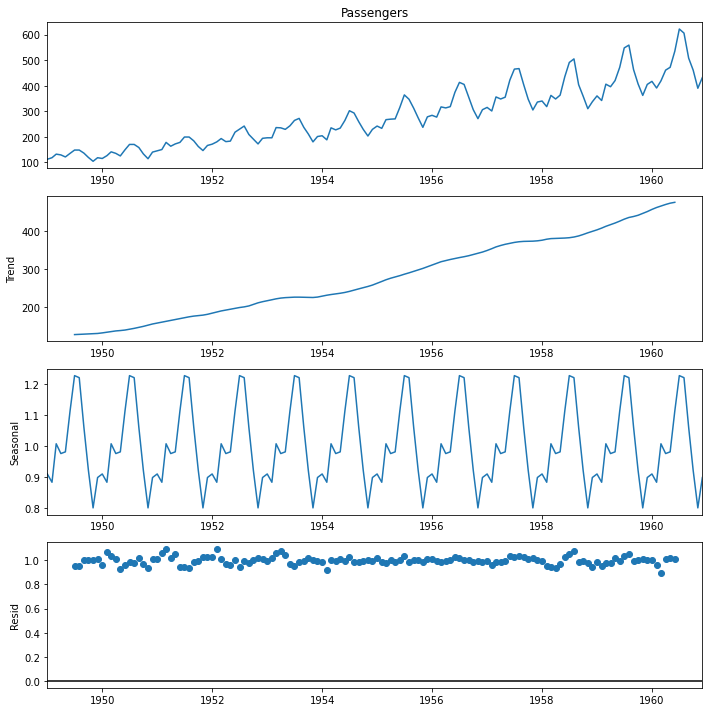

In [10]:
series = read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
result = seasonal_decompose(series, model='multiplicative')
plt.rcParams["figure.figsize"] = (10,10)
result.plot()
plt.show()

- the trend and seasonality information extracted from the series does seem reasonable.
- the residuals show periods of high variability in the early and later years of the series.